# IMPORTS

In [1]:
from utils_DP import *  
from utils_DC import *
import matplotlib.pyplot as plt

# DATA PREPARATION

X shape:  (3825, 16000)


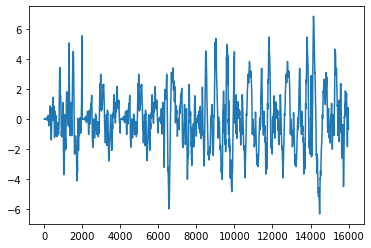

df shape:  (1912, 16000)


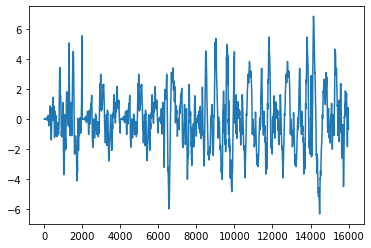

In [8]:
# Read dataset
data_dir = r'C:\Users\Usuario\OneDrive - Universidad Politécnica de Madrid\MUSE\S3\CE2\Code\Python\Data'
X, Y = f_Get_Impact_Database_XY( data_dir )
print("X shape: ", X.shape)
plt.plot( X.iloc[0].to_numpy() )
plt.show()

# Generate the different splits of datasets
kTTV_Dataset = Split_kTTV_Dataset(Y)

train_idx, test_idx, val_idx = kTTV_Dataset.get_idx(0)
df = X.loc[train_idx]
y_df = Y.loc[train_idx]
y = y_df['height']

X_train = X.loc[train_idx]
y_train = Y['height'].loc[train_idx]
X_test = X.loc[test_idx]
y_test = Y['height'].loc[test_idx]


print("df shape: ", df.shape)

plt.plot(X.loc[0])
plt.show()

# DATA CLEANING

(1912, 16000)
[]
(1912, 16000)
(1912, 16000)
[]
(1912, 16000)


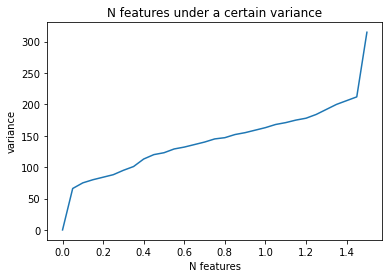

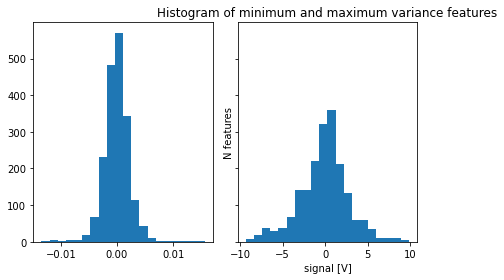

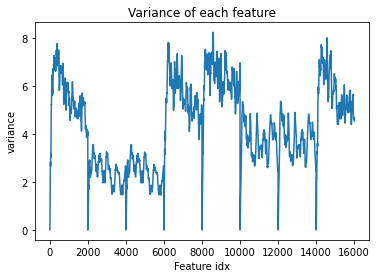

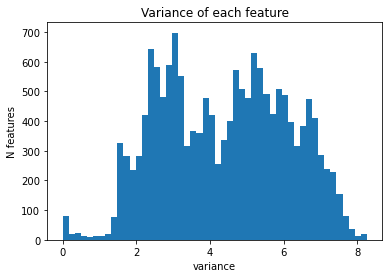

(1912, 16000)
Outlier label:  x         630.00
y         443.75
mass      160.00
height    210.00
energy      0.33
Name: 3457.0, dtype: float64
Outlier label:  x         630.00
y         443.75
mass      160.00
height    210.00
energy      0.33
Name: 3458.0, dtype: float64
(1910, 16000)
Pre missing values:  (1910, 16000)
Post missing values:  (1910, 16000)


In [3]:
# Delete columns with a single value
df = Single_Value_Column(df)

# Columns with very few values
df = Few_Value_Column(df, 1)

# Variance study
Variance_Study(df, var_min=0.0, var_max=1.55, var_step=0.05)

# Outlier identification
df, y_df = Remove_Outliers(df, y_df)

# Missing values
df, y_df = Remove_Missing_Values(df, y_df)

# FEATURE ENGINEERING

In [18]:
# example of correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88)
    #fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 60.828


In [19]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))